# Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from data import build_features as bf
from data import process_data as pd
from learning_library import logistic_regression as lr

# Tumor Radius

### Visualization

Text(0, 0.5, '0 - benign      1 - malignant')

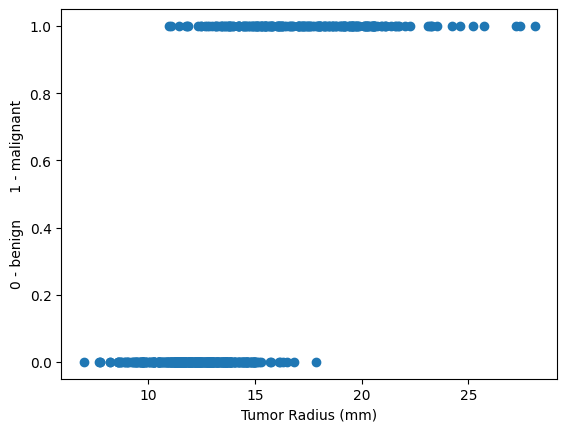

In [2]:
# Obtain X and y data as numpy arrays
X, y = pd.generate_data()

# Plot first feature - tumor radius
plt.scatter(X[:, 0], y)
plt.xlabel("Tumor Radius (mm)")
plt.ylabel("0 - benign      1 - malignant")

Here we can observe that tumors with a larger radius are more likely to be malignant. However, there's many tumors within the 12-15mm region that are both benign and malignant. We can thus proceed with a logistic regression model based on just the tumor radius and see how it performs.

### Training

In [10]:
# To start, we obtain the default 90% train/test split of our data
X_train, X_test, y_train, y_test = bf.training_data(X, y, 2)
X_train = np.array(X_train)
print(X_train)
print(X_train.shape)
w_vec, b = lr.gradient_descent(1000, X_train, y_train, 0.5, 0)

(array([[ 1.08659185, -2.08493813],
       [ 1.82885024, -0.30747058],
       [ 1.57567684,  0.52955068],
       ...,
       [ 0.35871832,  1.17896372],
       [-0.71151469, -1.0482825 ],
       [ 0.17171524, -1.04587726]]), array([14.21313867, 19.04833984]), array([3.47587856, 4.15760051]))


AttributeError: 'tuple' object has no attribute 'shape'